In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [59]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

from ladybug.epw import EPW
from ladybug.analysisperiod import AnalysisPeriod

import polars as pl


# from setup.setup import retrieve_test_case
# from case_edits.ezcase import create_ezcase
# from helpers.read_sql import get_sql_results
# from setup.data_wrangle2 import create_dataframe_for_case, create_wide_dataframe_for_many_qois
# from helpers.variable_interfaces import all_variables as vars

# from analysis.plot_subsurfaces import plot_surfaces
# from analysis.plot_helpers import plot_zone_domains
# from plan.graph_to_subsurfaces import load_attributes

# from helpers.helpers import chain_flatten
# from experiments.dynamic_door_sched import create_scheds, plot_geom_dist, HOURS_PER_DAY, INTERVALS_PER_HOUR

In [6]:
epw_path = Path.cwd()/ "weather_data" / "USA_CA_Palo.Alto.AP.724937_TMYx.epw"
epw_path.exists()

True

In [7]:
epw = EPW(epw_path)
epw

EPW file Data for [Palo.Alto.AP]

In [25]:
df = pl.DataFrame(data={
    "datetimes" : epw.dry_bulb_temperature.datetimes,
    "db_temp": epw.dry_bulb_temperature.values,
})
df.head()

datetimes,db_temp
datetime[μs],f64
2017-01-01 00:00:00,10.4
2017-01-01 01:00:00,8.8
2017-01-01 02:00:00,8.4
2017-01-01 03:00:00,7.9
2017-01-01 04:00:00,6.6


In [44]:
df = df.with_columns(date=pl.col("datetimes").dt.date(), month=pl.col("datetimes").dt.month())
df

datetimes,db_temp,date,month
datetime[μs],f64,date,i8
2017-01-01 00:00:00,10.4,2017-01-01,1
2017-01-01 01:00:00,8.8,2017-01-01,1
2017-01-01 02:00:00,8.4,2017-01-01,1
2017-01-01 03:00:00,7.9,2017-01-01,1
2017-01-01 04:00:00,6.6,2017-01-01,1
…,…,…,…
2017-12-31 19:00:00,12.0,2017-12-31,12
2017-12-31 20:00:00,12.0,2017-12-31,12
2017-12-31 21:00:00,12.0,2017-12-31,12


In [ ]:
# df_monthly_mean = df.group_by(pl.col("month")).agg(pl.mean("db_temp"))

In [41]:
df_daily_mean = df.group_by(pl.col("date")).agg(pl.mean("db_temp"))
df_daily_mean

date,db_temp
date,f64
2017-02-15,12.558333
2017-06-14,18.95
2017-10-05,16.045833
2017-10-11,16.75
2017-02-06,9.175
…,…
2017-08-21,19.766667
2017-01-01,9.158333
2017-08-12,19.691667


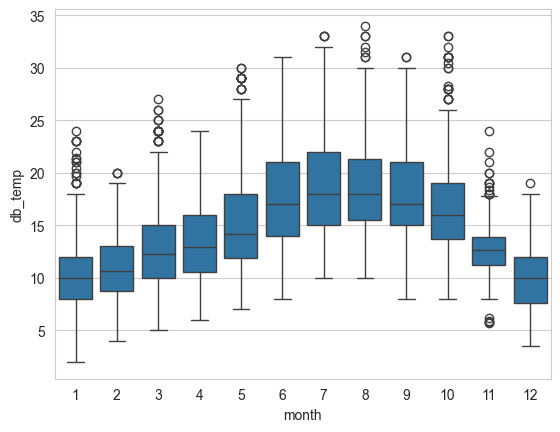

In [74]:
sns.boxplot(df, x="month", y="db_temp")
sns.set_style("ticks")

<Axes: xlabel='month', ylabel='db_temp'>

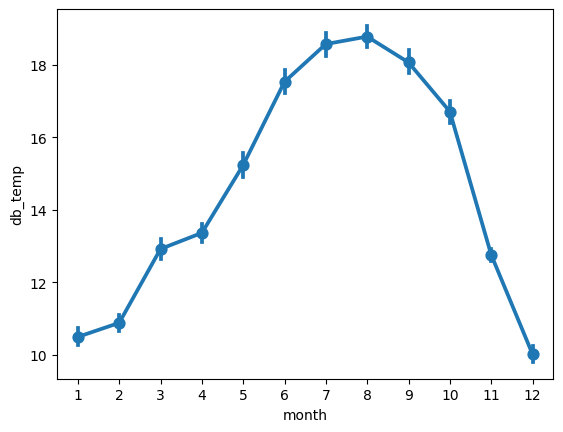

In [58]:
sns.pointplot(df, x="month", y="db_temp", )

In [64]:
ap = AnalysisPeriod(st_month=6, end_month=10, timestep=4)
ap

6/1 to 10/31 between 0 and 23 @4

In [77]:
start_day = ap.doys_int[0]
end_day = ap.doys_int[-1]
start_day, end_day

(152, 304)